#                DATA CLEANING OF bom.movie_gross.csv file
In data cleaning we will perform the following; 
  1. Handling missing values
  2. Datatype format
  3. Handling duplicates
  4. Checking column consistency.
  
First we will load the dataset then display the first few rows of the dataframe in order to understand its structure.


In [1]:
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import numpy as np
from scipy import stats
import itertools
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import zipfile
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

Let us load the dataset to see its content.

In [2]:
# Load the datasetbom.movie_gross.csv.gz
file_path = './Data/bom.movie_gross.csv'
bomdf = pd.read_csv(file_path)

bomdf.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
bomdf.isnull().sum() / len(bomdf) * 100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

The dataframe contains 5 columns and 3387 rows. The following are the columns with their brief information;

 1. TITLE; Represents name of the films(Object)
 2. STUDIO; Studio name(Object, with some missing values)
 3. DOMESTIC_GROSS; Domestic gross revenue(Float64, with some missing values)
 4. FOREIGN_GROSS; Foreign gross revenue(Object, with several missing values)
 5. YEAR; Year of production(int64)

In cleaning our dataset, there are crucial missing values which need to be filed back while dropping irrelevant columns that do not answer our analysis.We need to enforce a method that will handle the missing values in foreign_gross column while we retain other valuable columns.

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Filter relevant columns
bomdf =bomdf[['title', 'domestic_gross', 'foreign_gross', 'studio', 'year']]
#Drop irrelevant columbn(title)
bomdf = bomdf.drop(columns=['title'])

# Ensure columns are of type string before applying string methods
bomdf['domestic_gross'] = bomdf['domestic_gross'].astype(str)
bomdf['foreign_gross'] = bomdf['foreign_gross'].astype(str)
bomdf['studio'] = bomdf['studio'].astype(str)

# Remove commas and convert gross values to float
bomdf['domestic_gross'] = bomdf['domestic_gross'].str.replace(',', '').astype(float)
bomdf['foreign_gross'] = bomdf['foreign_gross'].str.replace(',', '').astype(float)

# Standardize studio names
bomdf['studio'] = bomdf['studio'].str.lower().str.strip()

# Impute missing values in 'foreign_gross' with mean
imputer = SimpleImputer(strategy='mean')
bomdf['foreign_gross'] = imputer.fit_transform(bomdf[['foreign_gross']])


# Retain the original 'studio' column
original_studio = bomdf['studio']

# Convert categorical variables using one-hot encoding
bomdf_encoded = pd.get_dummies(bomdf, columns=['studio'], drop_first=True)



# Add the original 'studio' column back to the encoded data
bomdf_encoded['studio'] = original_studio

# Reorder columns to move 'studio' next to 'title'
cols = bomdf_encoded.columns.tolist()
cols.insert(1, cols.pop(cols.index('studio')))
bomdf_encoded = bomdf_encoded[cols]



Let us now check the information of our cleaned dataset;

In [5]:
bomdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   domestic_gross  3359 non-null   float64
 1   foreign_gross   3387 non-null   float64
 2   studio          3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 106.0+ KB


Display the first 10 rows of cleaned data.

In [6]:
bomdf.head(10)

,domestic_gross,foreign_gross,studio,year
0,415000000.0,652000000.0,bv,2010
1,334200000.0,691300000.0,bv,2010
2,296000000.0,664300000.0,wb,2010
3,292600000.0,535700000.0,wb,2010
4,238700000.0,513900000.0,p/dw,2010
5,300500000.0,398000000.0,sum.,2010
6,312400000.0,311500000.0,par.,2010
7,200800000.0,391000000.0,bv,2010
8,251500000.0,291600000.0,uni.,2010
9,217600000.0,277300000.0,p/dw,2010


In [7]:
bomdf.shape

(3387, 4)

In the above code cell, we have seen that we retained the rows information by filling back and dropping irrelevant column. Thus this is our cleaned data ready for further analysis.

# EDA Analysis

We are going to perform the following analysis;

1. Multivariate analysis
2.Univariate analysis
3. Bivariate analysis

# 1.  Univariate analysis

We are going to analyse;
1. Number of movies by studio
2. Distribution of domestic gross and foreign gross
3. number of movies by year

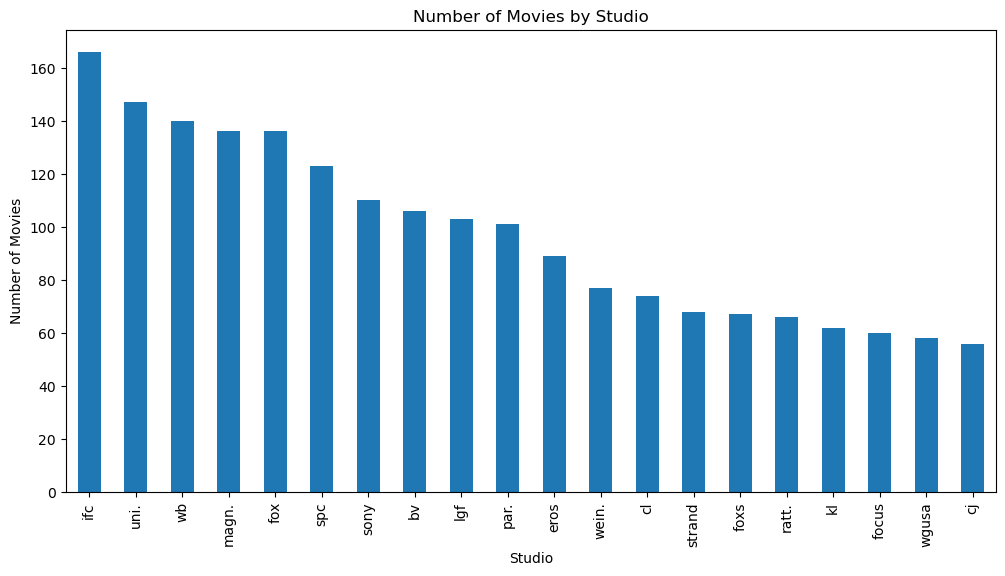

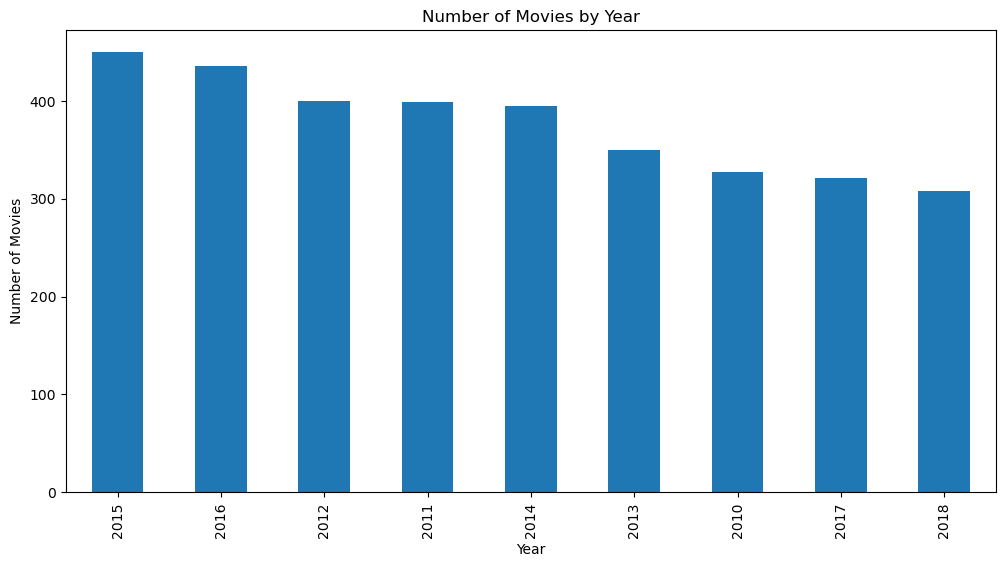

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


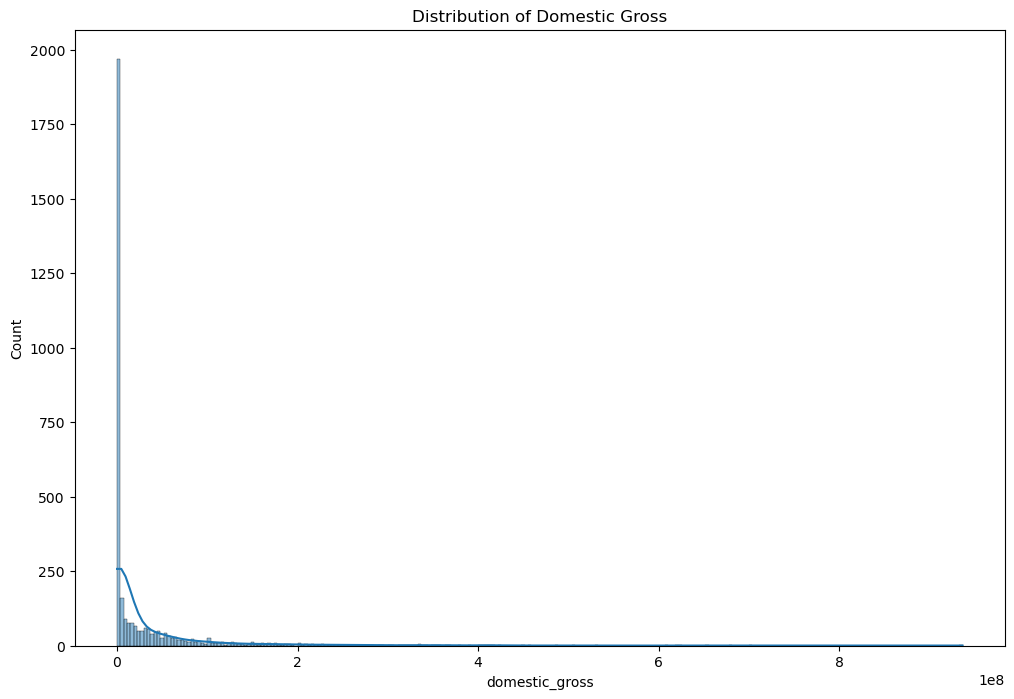

/home/ikn/miniforge3/envs/learn-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


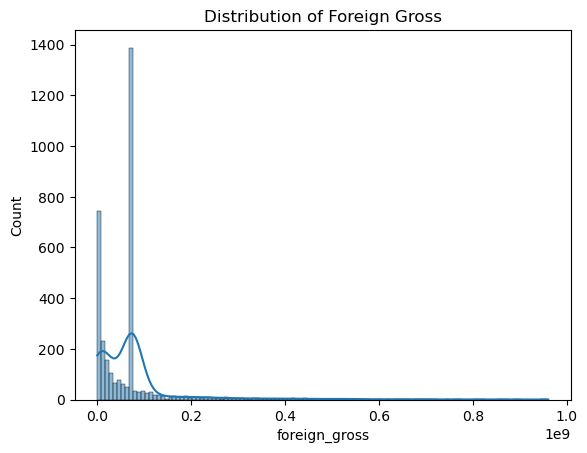

In [8]:
#Number of movies by studio

top_20_studios = bomdf['studio'].value_counts().nlargest(20)
top_20_studios.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Studio')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Studio')
plt.show()

#Number of movies by year
bomdf['year'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(bomdf['domestic_gross'], kde=True)
plt.title('Distribution of Domestic Gross')
plt.show()

plt.title('Distribution of Foreign Gross')
sns.histplot(bomdf['foreign_gross'], kde=True)
plt.title('Distribution of Foreign Gross')
plt.show()

# 2.Bivariate analysis

Now that we filled the missing values in foreign gross column we will ha to convert foreign_gross column to numeric values and handle any non-numeric entries by coercing them to NaN. In doing this we will nbe able to create clear visualization of our analysis.

The code cell below have code comments of the step we will perform.


In [9]:
data_cleaned = bomdf
data_cleaned['foreign_gross'] = pd.to_numeric(data_cleaned['foreign_gross'], errors='coerce')

# Handle non-numeric entries
print("\nMissing values in each column before handling foreign_gross:")
print(data_cleaned.isnull().sum())

# Handling large values in foreign_gross
max_value = 1e8  # Example maximum value for clipping
data_cleaned['foreign_gross'] = data_cleaned['foreign_gross'].clip(upper=max_value)

# Filtered Data
threshold = 1e8  # Example threshold for filtering
filtered_data = data_cleaned[data_cleaned['foreign_gross'] <= threshold]

# Handling missing values (drop rows with NaN values in foreign_gross)
filtered_data = filtered_data.dropna(subset=['foreign_gross'])



Missing values in each column before handling foreign_gross:
domestic_gross    28
foreign_gross      0
studio             0
year               0
dtype: int64


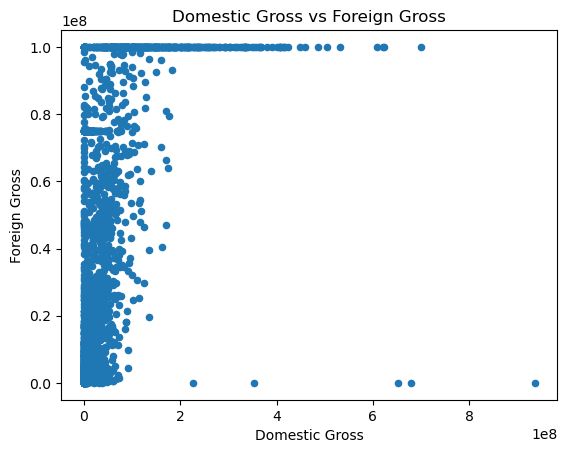

In [10]:
#Domestic vs Foreign Gross
data_cleaned.plot.scatter(x='domestic_gross', y='foreign_gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Domestic Gross vs Foreign Gross')
plt.show()


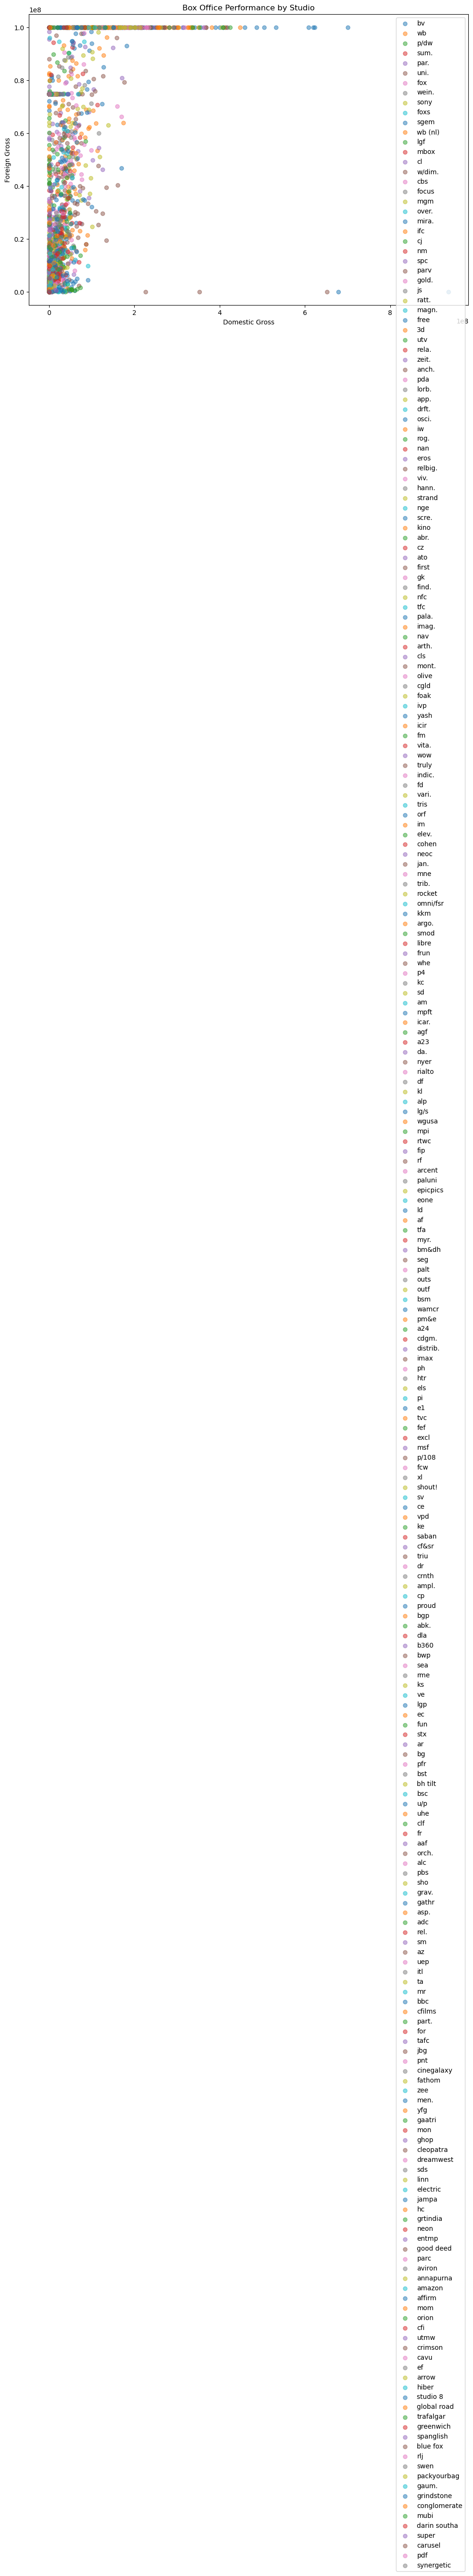

In [11]:
#Box Office Performance
studios = data_cleaned['studio'].unique()
plt.figure(figsize=(12, 8))
for studio in studios:
    studio_data = data_cleaned[data_cleaned['studio'] == studio]
    plt.scatter(studio_data['domestic_gross'], studio_data['foreign_gross'], label=studio, alpha=0.5)

plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Box Office Performance by Studio')
plt.legend()
plt.show()


# Now let us check top performing films both in domestic and foreign markets

In [12]:
#Top Grossing Films
top_domestic = data_cleaned.sort_values(by='domestic_gross', ascending=False).head(10)
top_foreign = data_cleaned.sort_values(by='foreign_gross', ascending=False).head(10)

("Top 10 Domestic Grossing Films:")
print(top_domestic[['domestic_gross', 'studio', 'year']])

("\nTop 10 Foreign Grossing Films:")
print(top_foreign[['foreign_gross', 'studio', 'year']])

      domestic_gross studio  year
1872     936700000.0     bv  2015
3080     700100000.0     bv  2018
3079     678800000.0     bv  2018
1873     652300000.0   uni.  2015
727      623400000.0     bv  2012
2758     620200000.0     bv  2017
3082     608600000.0     bv  2018
2323     532200000.0     bv  2016
2759     504000000.0     bv  2017
2324     486300000.0     bv  2016
      foreign_gross   studio  year
9       100000000.0     p/dw  2010
34      100000000.0       bv  2010
33      100000000.0  wb (nl)  2010
0       100000000.0       bv  2010
26      100000000.0      lgf  2010
63      100000000.0       cl  2010
8       100000000.0     uni.  2010
1879    100000000.0     par.  2015
1880    100000000.0      lgf  2015
1881    100000000.0      fox  2015


# Multivariate analysis

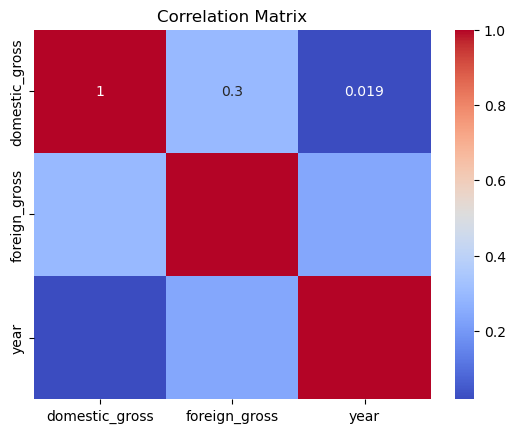

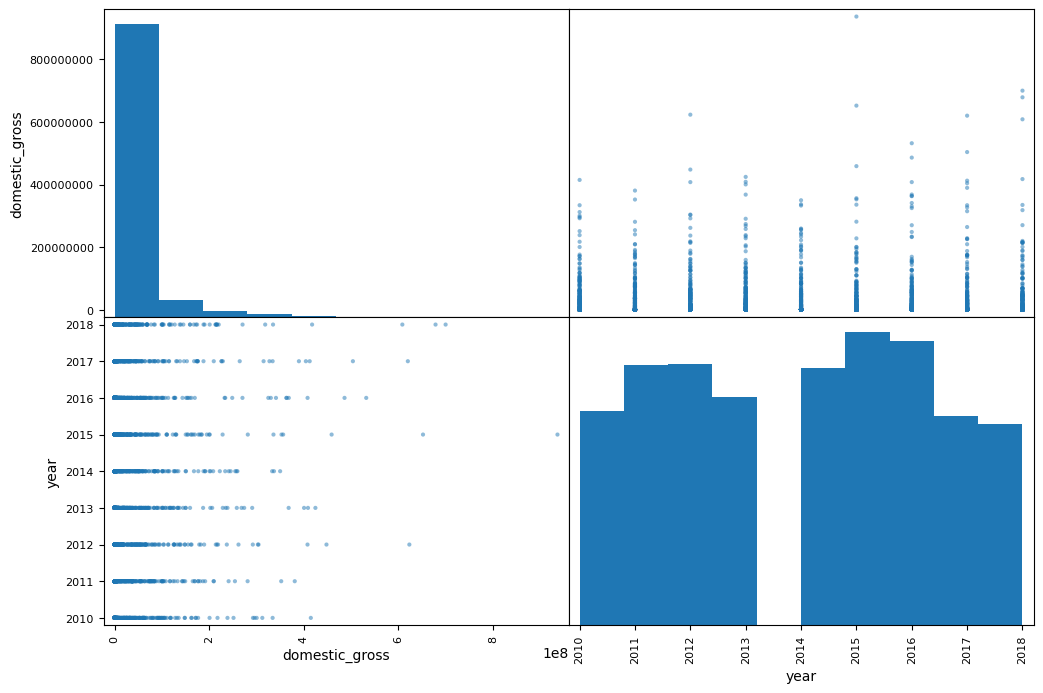

In [13]:
#Correlation analysis
corr = data_cleaned[['domestic_gross', 'foreign_gross', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Scatter matrix
pd.plotting.scatter_matrix(data_cleaned[['domestic_gross', 'year']], figsize=(12, 8))
plt.show()


# Hypothesis Testing

We are going to perform the following hypotheses;

  1. ANOVA
  2. t-test
  3. Pearson correlation

# 1. t-test

We shall perform both 0ne-tailed and two-tailed test.

First we will check form needed information then update our data on it.

In [14]:
unique_studios = bomdf['studio'].unique()
unique_studios[:5]

array(['bv', 'wb', 'p/dw', 'sum.', 'par.'], dtype=object)

In [15]:
major_studios = bomdf['studio'].unique()
major_studios[:5]

array(['bv', 'wb', 'p/dw', 'sum.', 'par.'], dtype=object)

In [16]:
from scipy.stats import ttest_ind

# Identify major studios
major_studios = bomdf['studio'].unique()

# Create a new column indicating whether the movie is from a major studio
filtered_data['major_studio'] = filtered_data['studio'].apply(lambda x: 1 if x in major_studios else 0)

# Split data into major and other studios
major_studios_gross = filtered_data[filtered_data['major_studio'] == 1]['domestic_gross']
other_studios_gross = filtered_data[filtered_data['major_studio'] == 0]['domestic_gross']

# Perform t-test
t_stat, p_value_two_tailed = ttest_ind(major_studios_gross, other_studios_gross, equal_var=False)
print(f"T-test: t-statistic = {t_stat}, two-tailed p-value = {p_value_two_tailed}")

# Calculate one-tailed p-value
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)
print(f"T-test: t-statistic = {t_stat}, one-tailed p-value = {p_value_one_tailed}")

T-test: t-statistic = nan, two-tailed p-value = nan
T-test: t-statistic = nan, one-tailed p-value = nan


In [17]:
t_stat, p_value = ttest_ind(major_studios_gross, other_studios_gross)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = nan, p-value = nan


In [18]:
from scipy.stats import ttest_ind 
t_stat, p_value_two_tailed = ttest_ind(major_studios_gross, other_studios_gross, equal_var=False)


if t_stat > 0:
    p_value_one_tailed = p_value_two_tailed / 2
else:
    p_value_one_tailed = 1 - (p_value_two_tailed / 2)

print(f"T-test: t-statistic = {t_stat}, one-tailed p-value = {p_value_one_tailed}")

T-test: t-statistic = nan, one-tailed p-value = nan


# 2. ANOVA

In [19]:
from scipy.stats import f_oneway

# Group data by year and calculate domestic gross
year_groups = [group['domestic_gross'].values for name, group in bomdf.groupby('year')]

# Perform ANOVA
f_stat, p_value = f_oneway(*year_groups)
print(f"ANOVA: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA: F-statistic = nan, p-value = nan


# Linear Regression Analysis

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
#Find linear regression of yearly average gross of domestic gross
yearly_avg_gross = bomdf.groupby('year')['domestic_gross'].mean().reset_index()
slope, intercept, r_value, p_value, std_err = linregress(yearly_avg_gross['year'], yearly_avg_gross['domestic_gross'])

(f"Linear regression: slope = {slope}, intercept = {intercept}, r-value = {r_value}, p-value = {p_value}, std err = {std_err}")

'Linear regression: slope = 577776.8483679781, intercept = -1134423292.7912571, r-value = 0.38302452546522375, p-value = 0.30891824510890364, std err = 526663.7456627247'

Now that we have our linear values, let us proceed to ploting the model of predicted and actual values of both domestic and foreign gross.

Mean Squared Error: 1049765773205488.8


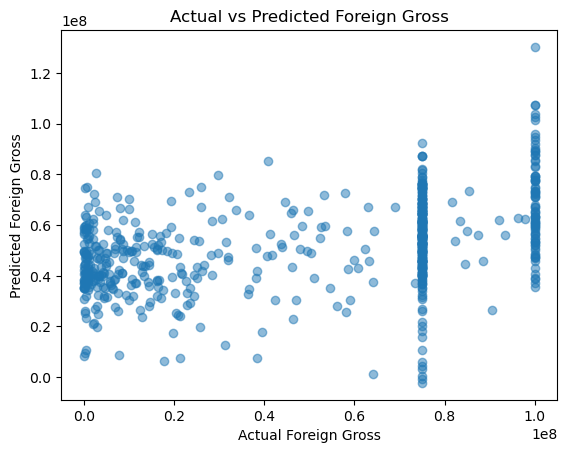

In [21]:
# Drop rows with NaN values in the relevant columns
filtered_data = filtered_data.dropna(subset=['domestic_gross', 'year', 'foreign_gross'])

# Encoding categorical variables
data_encoded = pd.get_dummies(filtered_data, columns=['studio'])

# Features and target variable
X = data_encoded[['domestic_gross', 'year'] + [col for col in data_encoded.columns if col.startswith('studio_')]]
y = data_encoded['foreign_gross']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Foreign Gross')
plt.ylabel('Predicted Foreign Gross')
plt.title('Actual vs Predicted Foreign Gross')
plt.show()

# Further Understanding of Linear Regression.
#Stepwise

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# One-hot encode the studio column
data_encoded = pd.get_dummies(data_cleaned, columns=['studio'])

In [23]:
# Prepare the data for regression
X = data_encoded[['domestic_gross', 'year'] + [col for col in data_encoded.columns if col.startswith('studio_')]]
y = data_encoded['foreign_gross']

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
X = data_cleaned[['domestic_gross']]
y = data_cleaned['foreign_gross']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
print(model.fit(X_train, y_train))

In [ ]:


# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()
